In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



We walk through a sparse AutoEncoder on the MNIST dataset

First the imports

In [2]:

import torch
from torch.utils.data import DataLoader
from svlearn_autoencoders.auto_encoders.vanilla_auto_encoder_mnist import AutoencoderMnist
import torchvision.datasets as datasets

Load the path for mnist data and results

In [3]:
from svlearn_autoencoders import config
mnist_data_path = config['mnist-classification']['data']
model_path = config['mnist-classification']['results']

In [4]:
mnist_trainset = datasets.MNIST(root=mnist_data_path, train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [5]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(eval_dataset, batch_size=128, shuffle=False)

Identify device (either cuda or cpu)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else device
model = AutoencoderMnist().to(device)

In [7]:
checkpoint = torch.load(f"{model_path}/mnist/mnist_sparse_autoencoder.pt")
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

AutoencoderMnist(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=1568, out_features=128, bias=True)
    (6): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=1568, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(32, 7, 7))
    (3): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  )
)

Visualize the reconstruction (top row being original images and bottom being reconstructed)

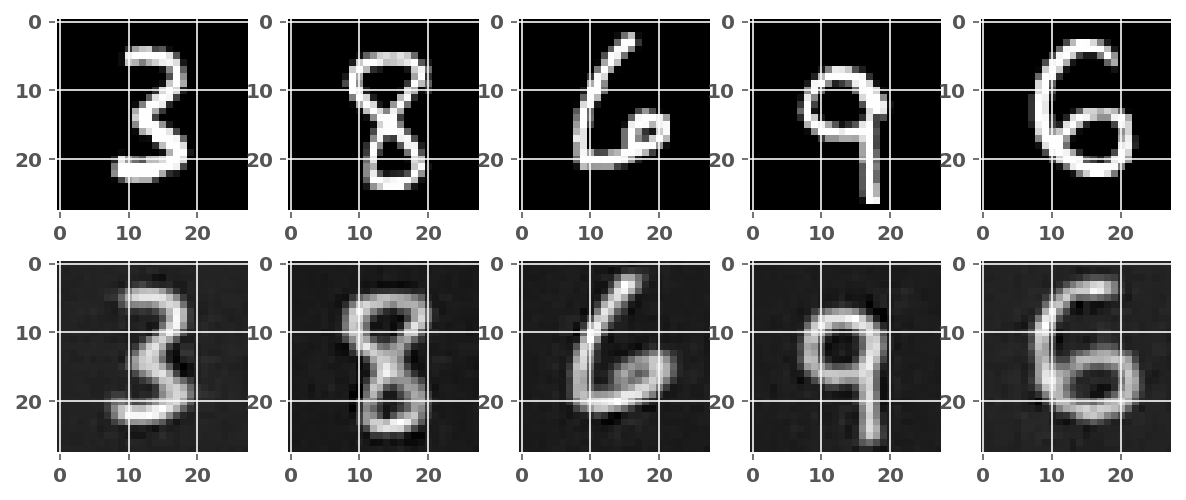

In [8]:
import matplotlib.pyplot as plt
model.eval()
with torch.no_grad():
    images = next(iter(val_loader))
    images = images.to(device)
    reconstructed, hidden = model(images)
    
    # Display original and reconstructed images
    _, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(5):
        axs[0, i].imshow(images[i].cpu().squeeze(0), cmap='gray')
        axs[1, i].imshow(reconstructed[i].cpu().squeeze(0), cmap='gray')
    plt.show()

In [9]:

# Function to plot mean activations of hidden vectors
def plot_hidden_activations(hidden_vectors):
    # Calculate mean activation for each hidden unit 
    mean_activation = torch.mean(hidden_vectors, dim=0).detach().numpy()
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(mean_activation)), mean_activation, color='blue', alpha=0.7)
    plt.xlabel('Hidden Unit Index')
    plt.ylabel('Mean Activation')
    plt.title('Mean Activation of Hidden Units')
    plt.legend()
    plt.show()

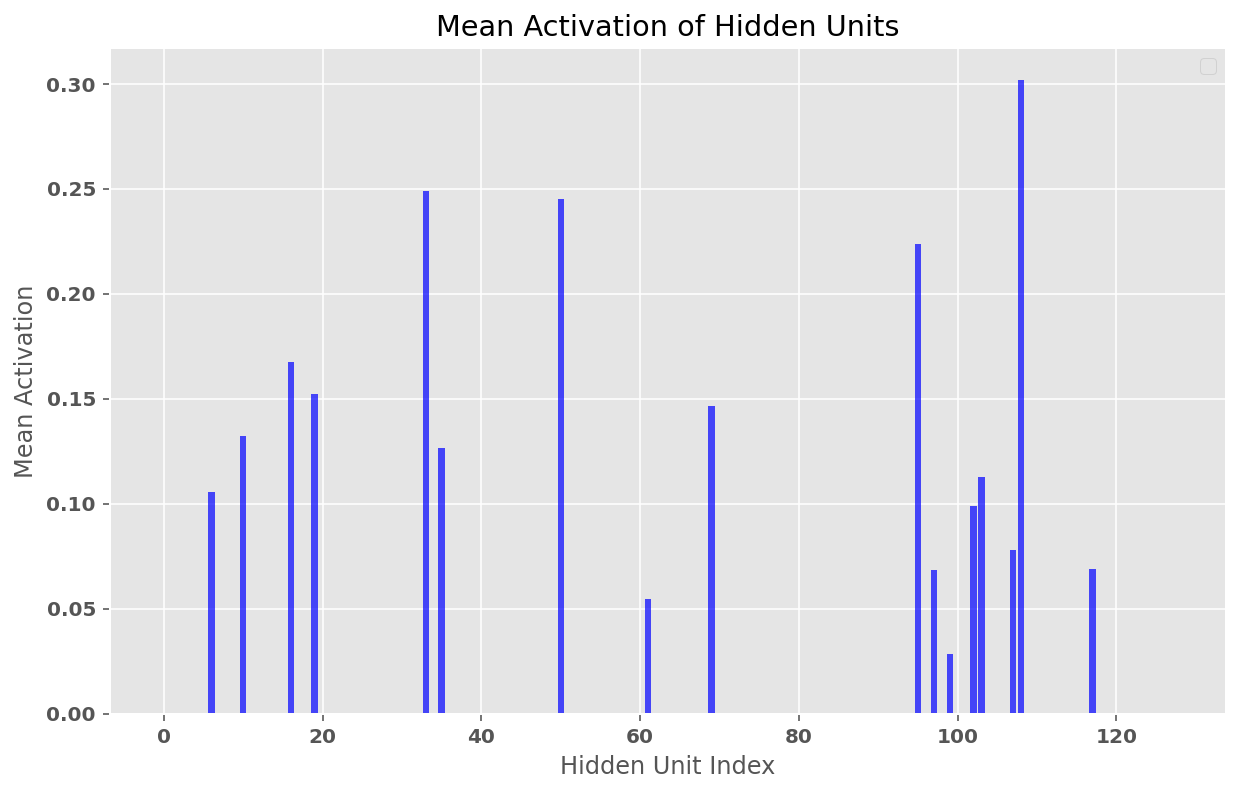

In [10]:
plot_hidden_activations(hidden[2:3].cpu())

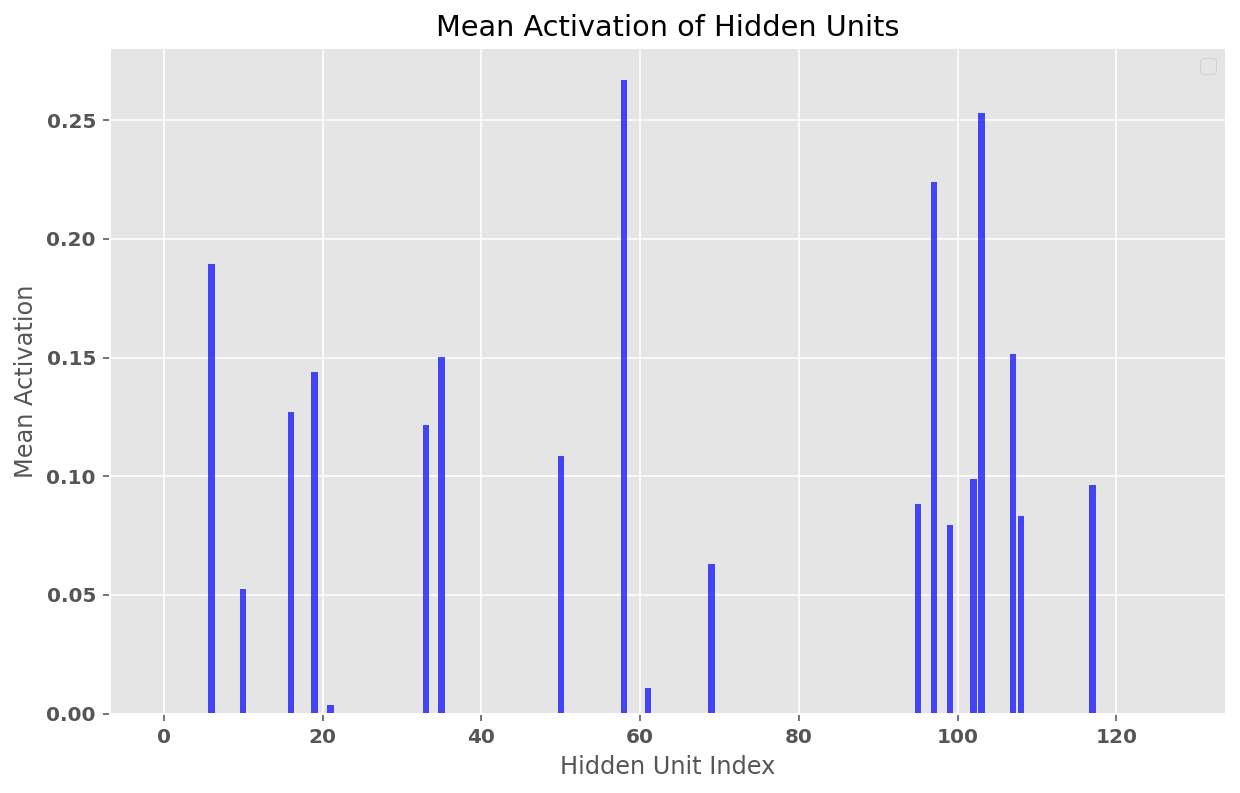

In [11]:
plot_hidden_activations(hidden[0:1].cpu())

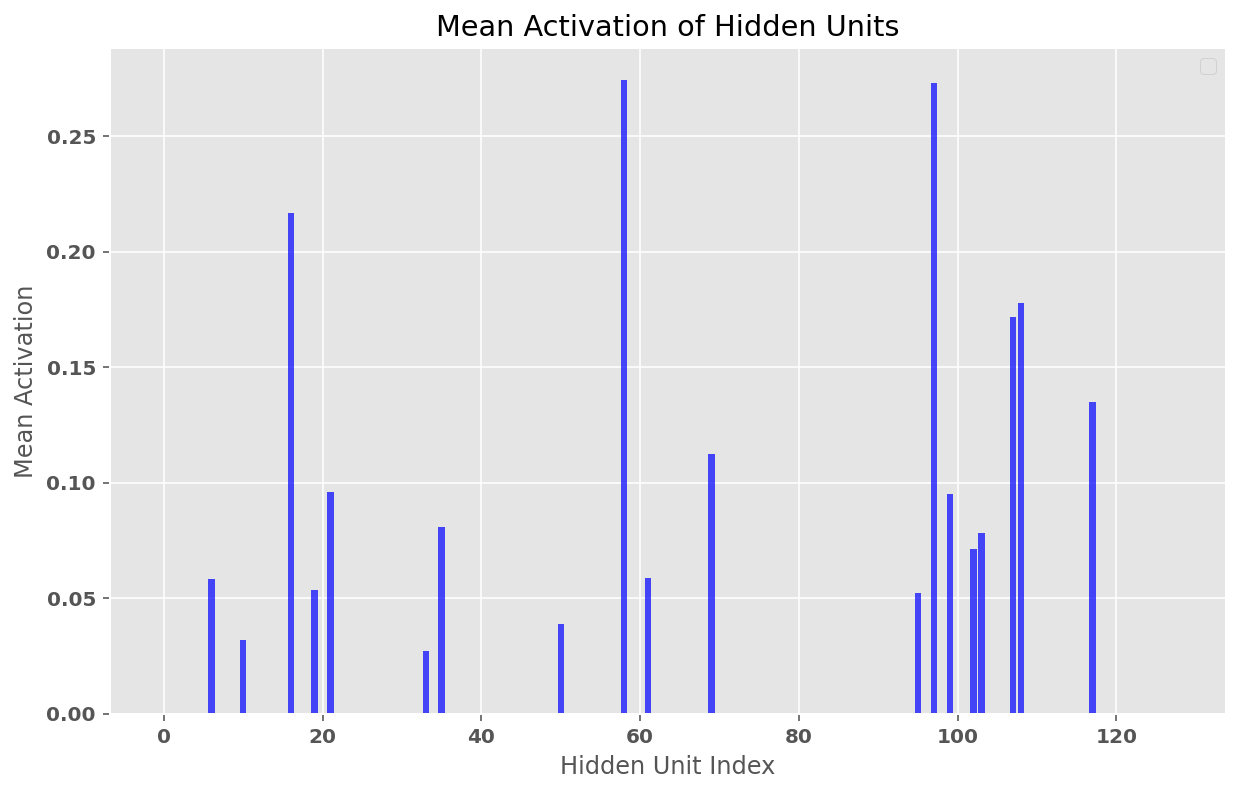

In [12]:
plot_hidden_activations(hidden[1:2].cpu())

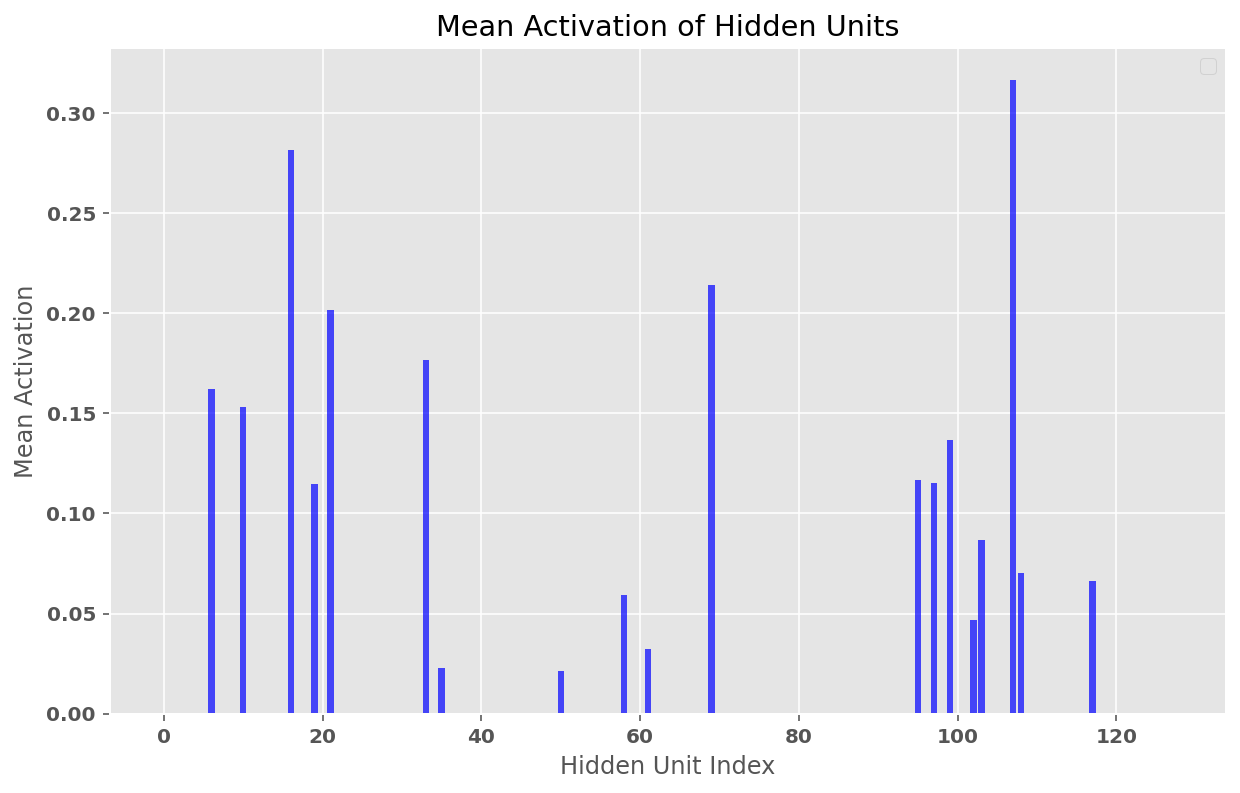

In [13]:
plot_hidden_activations(hidden[3:4].cpu())

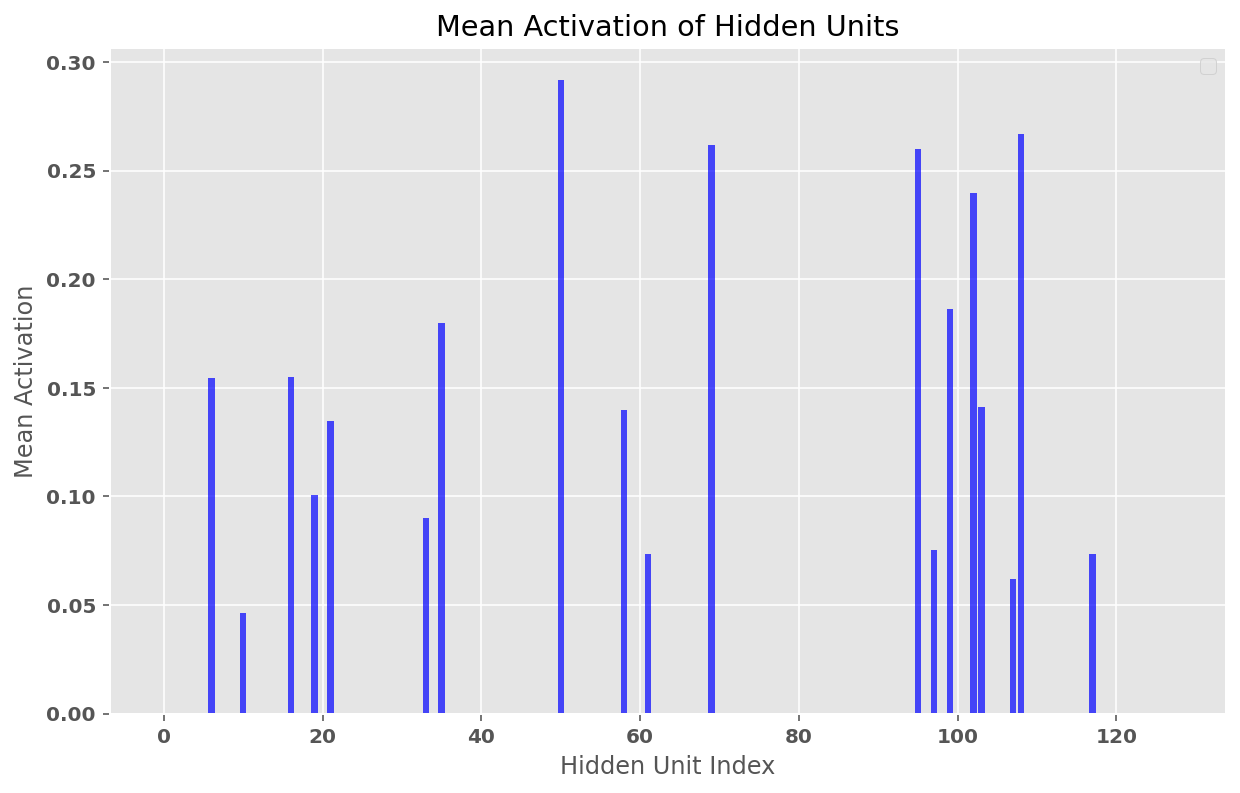

In [14]:
plot_hidden_activations(hidden[127:128].cpu())